In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
all_data = pd.read_csv('all_outputs_lung.txt', sep='\t')

In [5]:
all_data = all_data.drop(columns=['index'])
all_data = all_data[all_data['name'] != 'name']
all_data = all_data.reset_index().drop(columns=['index'])
all_data.shape

(1890, 2003)

In [6]:
all_data.head()

,name,8988T|DNase|None,AoSMC|DNase|None,Chorion|DNase|None,CLL|DNase|None,Fibrobl|DNase|None,FibroP|DNase|None,Gliobla|DNase|None,GM12891|DNase|None,GM12892|DNase|None,...,Osteoblasts|H2A.Z|None,Osteoblasts|H3K27ac|None,Osteoblasts|H3K27me3|None,Osteoblasts|H3K36me3|None,Osteoblasts|H3K4me1|None,Osteoblasts|H3K4me2|None,Osteoblasts|H3K4me3|None,Osteoblasts|H3K79me2|None,Osteoblasts|H3K9me3|None,Osteoblasts|H4K20me1|None
0,PLEC_ENST00000354958,1.22e-01,8.46e-03,1.26e-01,2.56e-02,1.04e-01,5.29e-02,2.07e-02,1.04e-01,8.80e-02,...,1.94e-01,6.66e-02,2.23e-01,2.10e-01,3.33e-01,5.73e-01,4.83e-01,4.52e-01,6.80e-03,4.86e-01
1,KRTAP10-4_ENST00000622352,1.08e-01,3.46e-02,5.00e-02,1.33e-02,7.31e-02,5.20e-02,6.42e-02,3.73e-02,3.31e-02,...,3.42e-02,2.25e-03,2.82e-02,1.04e-02,8.27e-03,1.02e-02,8.16e-03,1.61e-02,4.69e-02,3.95e-02
2,ATRX_ENST00000395603,1.22e-03,1.25e-03,1.48e-03,6.10e-04,9.28e-03,4.22e-03,2.89e-04,8.69e-04,7.23e-04,...,3.11e-03,7.12e-03,3.88e-02,6.31e-01,8.98e-03,6.39e-03,3.92e-03,1.84e-01,5.47e-02,6.29e-02
3,PLEC,1.20e-01,1.05e-02,1.97e-01,2.56e-02,1.19e-01,5.39e-02,2.33e-02,1.28e-01,9.65e-02,...,2.05e-01,4.59e-02,2.22e-01,1.67e-01,2.48e-01,5.07e-01,3.87e-01,2.96e-01,5.69e-03,2.67e-01
4,SORCS1_ENST00000622431,1.98e-02,1.43e-03,1.06e-02,1.73e-03,6.05e-02,1.52e-02,4.62e-03,4.32e-03,5.49e-03,...,1.83e-03,7.61e-03,1.28e-01,1.87e-01,1.34e-02,1.60e-02,6.03e-03,2.83e-02,4.70e-02,2.38e-02


In [7]:
for i in np.arange(len(all_data.columns) - 1):
    for j in np.arange(1890):
        column_name = all_data.columns[i+1]
        all_data[column_name][j] = float(all_data[column_name][j])

In [8]:
column_sums = np.empty(0)

for i in np.arange(len(all_data.columns) - 1):
    column_name = all_data.columns[i+1]
    column_sums = np.append(column_sums, np.sum(all_data[column_name]))

In [9]:
column_names = all_data.columns[1:]
assert len(column_names) == len(column_sums)

In [10]:
sums_df = pd.DataFrame()
sums_df['Index'] = np.arange(len(column_sums))
sums_df['Sums'] = column_sums

<AxesSubplot:xlabel='Index', ylabel='Sums'>

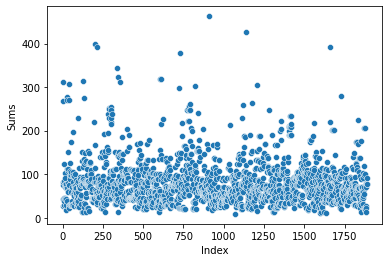

In [12]:
import seaborn as sns
rows_df = pd.DataFrame()
rows_df['Sums'] = all_data[all_data.columns[1:]].sum(axis=1)
rows_df['Index'] = np.arange(len(rows_df['Sums']))
sns.scatterplot(data=rows_df, x='Index', y='Sums')

In [16]:
np.percentile(np.array(rows_df['Sums']), 95)

184.90471524199987

In [21]:
significant_rows = (np.array(all_data['name']) * (np.array(rows_df['Sums']) > 185))
significant_rows = significant_rows[significant_rows != '']



In [22]:
significant_rows, len(significant_rows)

(array(['PLEC_ENST00000354958', 'PLEC', 'PLEC_ENST00000398774',
        'PLEC_ENST00000354589', 'PLEC_ENST00000345136',
        'PLEC_ENST00000357649', 'PLEKHB2_ENST00000404460', 'ZIC1',
        'RBFOX1_ENST00000641259', 'SLITRK1', 'HDAC9_ENST00000401921',
        'HDAC9_ENST00000406451', 'HDAC9', 'RIMS1_ENST00000491071',
        'DYSF_ENST00000258104', 'DYSF_ENST00000413539',
        'DYSF_ENST00000409582', 'DYSF_ENST00000409762',
        'DYSF_ENST00000429174', 'DYSF', 'DYSF_ENST00000394120',
        'DYSF_ENST00000409744', 'DYSF_ENST00000410041',
        'DYSF_ENST00000409651', 'DYSF_ENST00000409366',
        'PLEC_ENST00000527096', 'PLEC_ENST00000436759',
        'PLEC_ENST00000356346', 'ZNF479_ENST00000319636',
        'SLIT3_ENST00000519560', 'TCHH', 'TCHH_ENST00000368804',
        'DLGAP2_ENST00000612087', 'SALL3', 'AR_ENST00000612452',
        'AR_ENST00000396044', 'DNMT3A', 'CHD5', 'CACNA1A_ENST00000573710',
        'CACNA1A_ENST00000360228', 'CACNA1A_ENST00000637769',
       

In [23]:
for i in np.arange(len(significant_rows)):
    significant_rows[i] = significant_rows[i].partition('_')[0]

In [24]:
significant_rows

array(['PLEC', 'PLEC', 'PLEC', 'PLEC', 'PLEC', 'PLEC', 'PLEKHB2', 'ZIC1',
       'RBFOX1', 'SLITRK1', 'HDAC9', 'HDAC9', 'HDAC9', 'RIMS1', 'DYSF',
       'DYSF', 'DYSF', 'DYSF', 'DYSF', 'DYSF', 'DYSF', 'DYSF', 'DYSF',
       'DYSF', 'DYSF', 'PLEC', 'PLEC', 'PLEC', 'ZNF479', 'SLIT3', 'TCHH',
       'TCHH', 'DLGAP2', 'SALL3', 'AR', 'AR', 'DNMT3A', 'CHD5', 'CACNA1A',
       'CACNA1A', 'CACNA1A', 'CACNA1A', 'CACNA1A', 'CACNA1A', 'CACNA1A',
       'CACNA1A', 'PDZRN3', 'CHD7', 'PCDH17', 'GALNT17', 'ZNF479',
       'PCDH10', 'PCDHGB5', 'PCDHB7', 'PCDHGA12', 'RIMS1', 'RIMS1',
       'PCDH10', 'NOTCH3', 'DLGAP2', 'DLGAP2', 'GNAS', 'GNAS', 'DSCAML1',
       'DSCAML1', 'SMARCA4', 'CSMD2', 'CSMD2', 'SMARCA4', 'SMARCA4',
       'SMARCA4', 'SMARCA4', 'SMARCA4', 'SMARCA4', 'SMARCA4', 'SMARCA4',
       'SMARCA4', 'SMARCA4', 'SMARCA4', 'SMARCA4', 'SMARCA4', 'SMARCA4',
       'SMARCA4', 'RPTOR', 'DNMT3A', 'GALNT17', 'HDAC9', 'NLGN4X',
       'NLGN4X', 'NLGN4X', 'NLGN4X', 'FMN2', 'NRXN3', 'OTOF', 'OTOF'],

In [25]:
thresholded = pd.DataFrame()
thresholded['Thresholded'] = significant_rows
index = np.arange(len(thresholded))
thresholded['Index'] = index
thresholded = thresholded.groupby(['Thresholded'])['Thresholded'].value_counts().to_frame('Count')
thresholded['Thresholded'] = thresholded.index.droplevel(1)
thresholded = thresholded.reset_index(drop=True)

In [26]:
thresholded

,Count,Thresholded
0,2,AR
1,8,CACNA1A
2,1,CHD5
3,1,CHD7
4,2,CSMD2
5,3,DLGAP2
6,2,DNMT3A
7,2,DSCAML1
8,11,DYSF
9,1,FMN2


In [27]:
thresholded.to_csv('lung_cancer_prioritized.csv')